## Exploring the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("Datasets/date_value.csv", index_col=0, parse_dates=True)

In [4]:
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [5]:
data.shape

(204, 1)

In [6]:
data.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


<AxesSubplot:xlabel='date'>

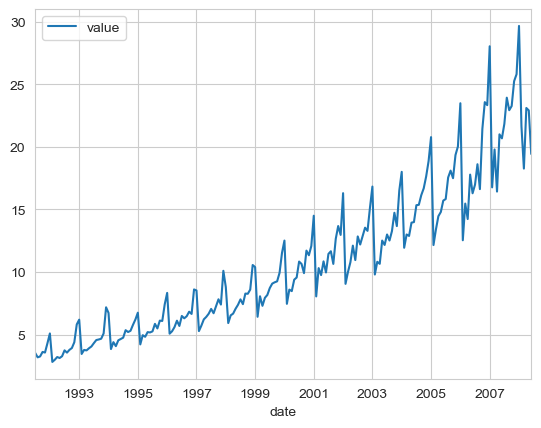

In [8]:
data.plot()

In [10]:
data.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

* As we can see the dates are month wise for the range from 1991 to 2008.
* The data seems to be non-stationary as there are some seasonal components.
* We can check this using a test.

## Stationarity Dickey-Fuller test

In [11]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(data['value'], autolag="AIC")

In [12]:
df_test

(3.1451856893067394,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [13]:
print('ADF Statistic: %f' % df_test[0])

print('p-value: %f' % df_test[1])

print('Critical Values:')

for key, value in df_test[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test[0] < df_test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
Failed to Reject Ho - Time Series is Non-Stationary


* It fails the df test so it is non stationary.
* We must now make the data stationary.

## Converting the data set to Stationary

* One of the most common methods used for this is differencing.
* We subtract the current value with the previous values.
* First order - subtract k value with k-1 value.

In [82]:
values_diff_1 = np.diff(data.values, n=1, axis=0)

In [83]:
values_diff_1.shape

(203, 1)

In [84]:
data.values.shape

(204, 1)

In [85]:
values_diff_2 = np.diff(data.values, n=2, axis=0)
values_diff_2.shape

(202, 1)

* Another common method is to apply the log.

In [86]:
values_log = np.log(data.values)
values_log.shape

(204, 1)

Text(0, 0.5, 'Logarithm')

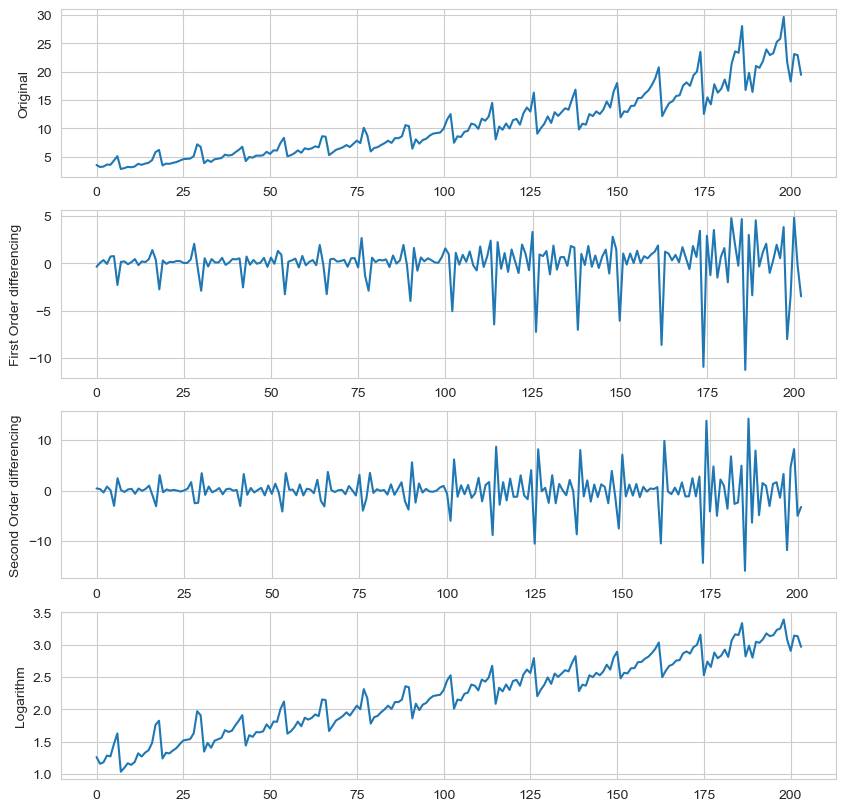

In [87]:
fig, ax = plt.subplots(4, figsize=(10, 10))
ax[0].plot(data.values)
ax[0].set_ylabel("Original")
ax[1].plot(values_diff_1)
ax[1].set_ylabel("First Order differencing")
ax[2].plot(values_diff_2)
ax[2].set_ylabel("Second Order differencing")
ax[3].plot(values_log)
ax[3].set_ylabel("Logarithm")

In [90]:
df_test_diff1 = adfuller(values_diff_1, autolag="AIC")
df_test_diff1

(-2.4951721474497064,
 0.11665341686469594,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 547.1880809726356)

In [91]:
print('ADF Statistic: %f' % df_test_diff1[0])

print('p-value: %f' % df_test_diff1[1])

print('Critical Values:')

for key, value in df_test_diff1[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test_diff1[0] < df_test_diff1[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -2.495172
p-value: 0.116653
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
Failed to Reject Ho - Time Series is Non-Stationary


In [92]:
df_test_diff2 = adfuller(values_diff_2, autolag="AIC")
df_test_diff2

(-10.292304706517315,
 3.543916358529444e-18,
 14,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 548.8960194373415)

In [93]:
print('ADF Statistic: %f' % df_test_diff2[0])

print('p-value: %f' % df_test_diff2[1])

print('Critical Values:')

for key, value in df_test_diff2[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test_diff2[0] < df_test_diff2[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -10.292305
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
Reject Ho - Time Series is Stationary


* From the above we can see that first order differencing and lograthim failed the test.
* But second order differnecing passes the test.

## Autocorrelation function

* The MA model uses the ACF plot to determine the order of the model q.

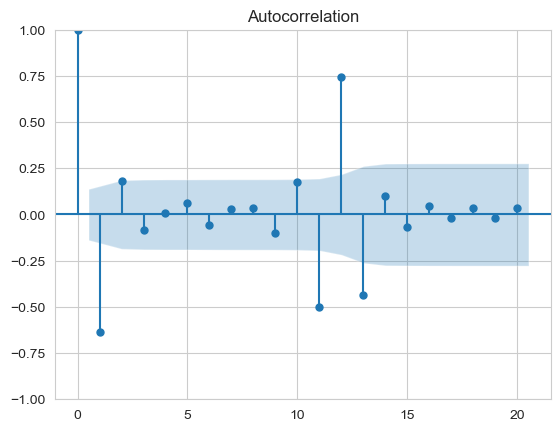

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(values_diff_2, lags=20)

* Here we can take the q value to be 2.
* There are some spikes later on but we ignore this for simplicity sake.
* They are called white noise and have ways to be dealt with.

## MA model

In [97]:
values_diff_2.shape

(202, 1)

In [98]:
train = values_diff_2[:190]
test = values_diff_2[190:]

In [99]:
train, test

(array([[ 4.17030000e-01],
        [ 2.87452000e-01],
        [-4.03916000e-01],
        [ 7.85636000e-01],
        [ 4.14620000e-02],
        [-3.05577900e+00],
        [ 2.44510600e+00],
        [ 4.76780000e-02],
        [-2.96171000e-01],
        [ 2.20147000e-01],
        [ 3.24382820e-01],
        [-6.46402550e-01],
        [ 3.97500370e-01],
        [-7.11369500e-02],
        [ 3.14751810e-01],
        [ 9.61977750e-01],
        [-1.04249973e+00],
        [-3.12272922e+00],
        [ 3.06266057e+00],
        [-3.59453830e-01],
        [ 2.09099980e-01],
        [-2.68078000e-02],
        [ 1.21590160e-01],
        [-1.92593500e-02],
        [-2.00141550e-01],
        [ 1.27117800e-02],
        [ 3.66800900e-01],
        [ 1.66013059e+00],
        [-2.53460987e+00],
        [-2.44170638e+00],
        [ 3.44299349e+00],
        [-8.71532830e-01],
        [ 7.84039010e-01],
        [-3.60333990e-01],
        [ 2.02127000e-03],
        [ 4.91006690e-01],
        [-7.44147970e-01],
 

In [106]:
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(train, order=(0, 0, 2))
ma_res = ma_model.fit()

In [108]:
print(ma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  190
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -385.786
Date:                Thu, 16 Mar 2023   AIC                            779.572
Time:                        21:11:49   BIC                            792.560
Sample:                             0   HQIC                           784.833
                                - 190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      4.168      0.000       0.000       0.001
ma.L1         -1.9898      0.362     -5.500      0.000      -2.699      -1.281
ma.L2          0.9899      0.356      2.782      0.0

* Here we use the ARIMA model but we set the order of AR and other components to 0, making it a plain MA model.
* Now we can make predictions and compare with the test data.

In [109]:
pred = ma_res.predict(start=0, end=len(values_diff_2)-1, dynamic=False)

The predicted values are:  [-0.08309589  0.55375355  0.00066999  0.00066999  0.00066999  0.00066999
  0.00066999  0.00066999  0.00066999  0.00066999  0.00066999  0.00066999]


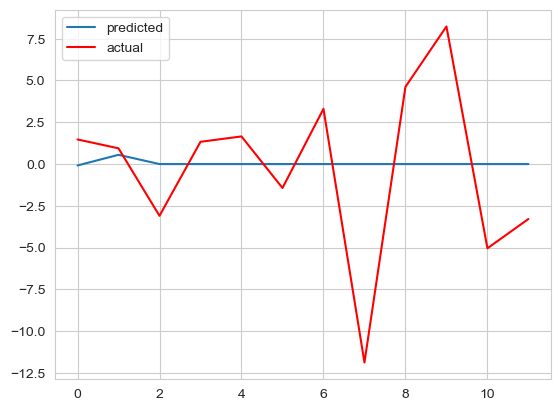

In [112]:
plt.plot(pred, label="predicted")
plt.plot(test, color='red', label="actual")
plt.legend()
print("The predicted values are: " ,pred)

* Now predicting future values.

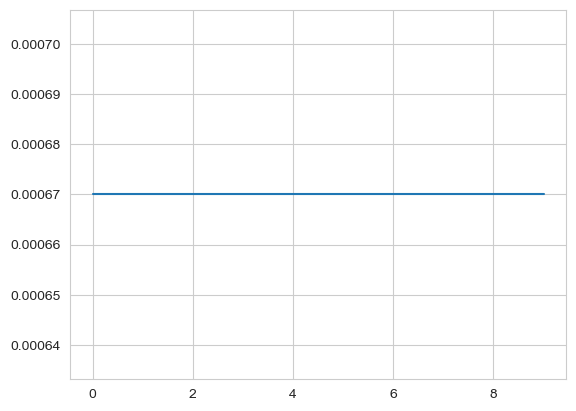

In [117]:
pred_future = ma_res.predict(start=len(values_diff_2)+1, end=len(values_diff_2)+10, dynamic=False)
plt.plot(pred_future)

# Now applying the MA model on a different dataset

## Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("Datasets/Month_value_1.csv", index_col=0, parse_dates=True)
data.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-01-12
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


In [4]:
data.shape

(96, 4)

In [5]:
data.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


<AxesSubplot:xlabel='Period'>

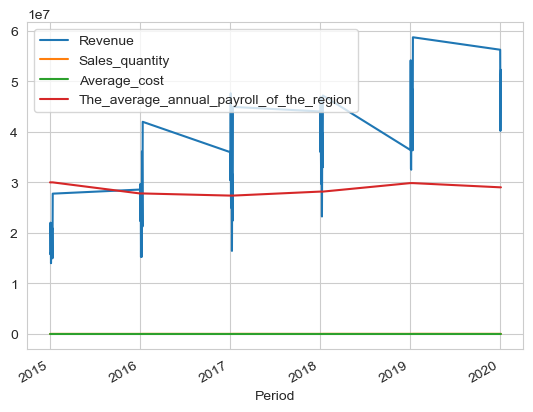

In [6]:
data.plot()

* From the data we can see that the the cost and payroll are too constant.
* However the revenue data seems to be of some use for predictions.

In [8]:
revenue_data = data['Revenue']
revenue_data.head()

Period
2015-01-01    1.601007e+07
2015-01-02    1.580759e+07
2015-01-03    2.204715e+07
2015-01-04    1.881458e+07
2015-01-05    1.402148e+07
Name: Revenue, dtype: float64

In [10]:
revenue_data.shape

(96,)

In [18]:
revenue_data.isnull().value_counts()

False    64
True     32
Name: Revenue, dtype: int64

In [20]:
revenue_data.tail()

Period
2022-01-08   NaN
2022-01-09   NaN
2022-01-10   NaN
2022-01-11   NaN
2022-01-12   NaN
Name: Revenue, dtype: float64

In [24]:
revenue_data_clean = revenue_data.dropna()

In [25]:
revenue_data_clean

Period
2015-01-01    1.601007e+07
2015-01-02    1.580759e+07
2015-01-03    2.204715e+07
2015-01-04    1.881458e+07
2015-01-05    1.402148e+07
                  ...     
2019-01-12    5.875647e+07
2020-01-01    5.628830e+07
2020-01-02    4.022524e+07
2020-01-03    5.002217e+07
2020-01-04    5.232069e+07
Name: Revenue, Length: 64, dtype: float64

In [26]:
revenue_data_clean = revenue_data_clean / 1000 # changing the data from scientific form to float form

Period
2015-01-01    16010.072120
2015-01-02    15807.587450
2015-01-03    22047.146024
2015-01-04    18814.583294
2015-01-05    14021.479612
                  ...     
2019-01-12    58756.473661
2020-01-01    56288.300870
2020-01-02    40225.243264
2020-01-03    50022.165233
2020-01-04    52320.692943
Name: Revenue, Length: 64, dtype: float64

## Dickey-Fuller test for Stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(revenue_data_clean, autolag="AIC")
df_test

(-0.2691489356436284,
 0.9297615379617787,
 11,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 1774.2279588451102)

In [29]:
print('ADF Statistic: %f' % df_test[0])

print('p-value: %f' % df_test[1])

print('Critical Values:')

for key, value in df_test[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test[0] < df_test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -0.269149
p-value: 0.929762
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
Failed to Reject Ho - Time Series is Non-Stationary


* As we can see the data is not stationary.
* We will now convert it to statioanry form.

## Converting to Stationary

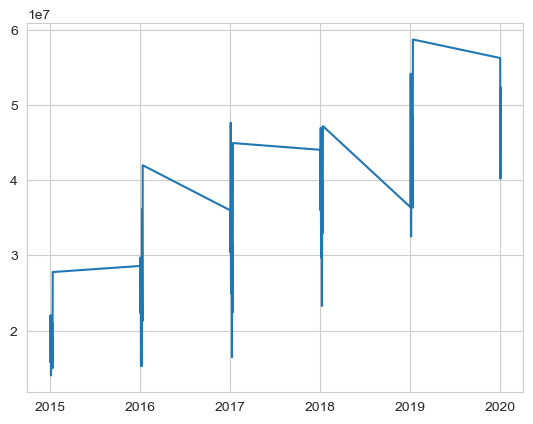

In [30]:
plt.plot(revenue_data_clean)

In [36]:
values_diff_1 = np.diff(revenue_data_clean, n=1, axis=0)

In [37]:
values_diff_2 = np.diff(revenue_data_clean, n=2, axis=0)

Text(0, 0.5, 'Second Order differencing')

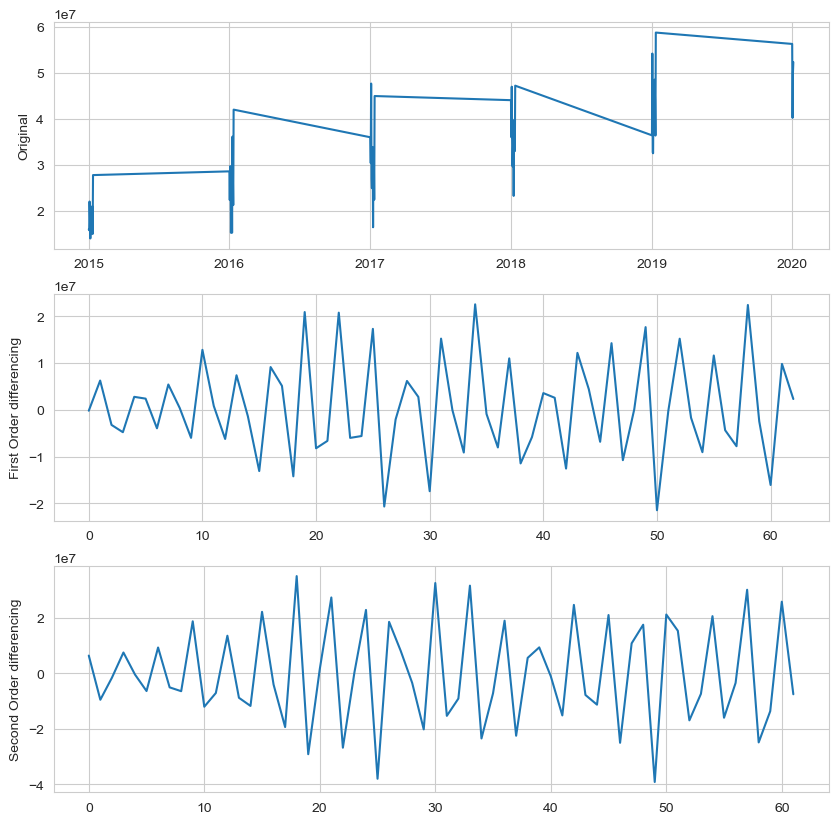

In [38]:
fig, ax = plt.subplots(3, figsize=(10, 10))
ax[0].plot(revenue_data_clean)
ax[0].set_ylabel("Original")
ax[1].plot(values_diff_1)
ax[1].set_ylabel("First Order differencing")
ax[2].plot(values_diff_2)
ax[2].set_ylabel("Second Order differencing")

* Here we can see that there is not much difference between first and secind order differencing, so we can choose either one.

In [39]:
from statsmodels.tsa.stattools import adfuller
df_test_diff1 = adfuller(values_diff_1, autolag="AIC")
df_test_diff1

(-5.604330112829505,
 1.244137799553809e-06,
 10,
 52,
 {'1%': -3.562878534649522,
  '5%': -2.918973284023669,
  '10%': -2.597393446745562},
 1739.0565654383058)

In [41]:
print('ADF Statistic: %f' % df_test_diff1[0])

print('p-value: %f' % df_test_diff1[1])

print('Critical Values:')

for key, value in df_test_diff1[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test_diff1[0] < df_test_diff1[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -5.604330
p-value: 0.000001
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
Reject Ho - Time Series is Stationary


## Autocorrelation Function

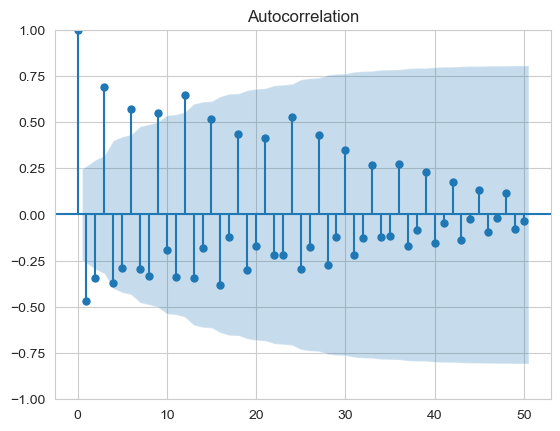

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(values_diff_1, lags=50)

* From the acf plot we can say that upto lag 9 there is strong correlation.

## MA model

In [47]:
values_diff_1.shape

(63,)

In [48]:
train = values_diff_1[:len(values_diff_1)-7]
test = values_diff_1[len(values_diff_1)-7:]

In [49]:
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(train, order=(0, 0, 9)).fit()

In [51]:
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:                 ARIMA(0, 0, 9)   Log Likelihood                -966.243
Date:                Fri, 17 Mar 2023   AIC                           1954.486
Time:                        14:43:28   BIC                           1976.765
Sample:                             0   HQIC                          1963.124
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.806e+05   6.13e+05      0.947      0.343   -6.21e+05    1.78e+06
ma.L1         -0.8826      0.692     -1.276      0.202      -2.238       0.473
ma.L2         -0.0886      0.777     -0.114      0.9

In [55]:
pred = ma_model.predict(start=len(train), end=len(values_diff_1)-1, dynamic=False)

* Predicting the values of the nesxt week after training and comapring it with the test data.

The predicted values are:  [-1564991.9566316  -7304080.41407347  8530029.61781268   741295.4635261
 -6628825.8271663   4468475.53518902   818049.48087222]


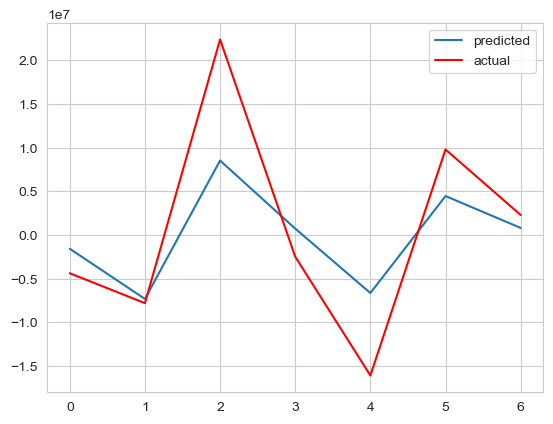

In [56]:
plt.plot(pred, label="predicted")
plt.plot(test, color='red', label="actual")
plt.legend()
print("The predicted values are: " ,pred)

* From the above data we can see that the predictions were made and they were quite close to the actual test data.

* Now we can get the error of this model's predictions.

In [58]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))
print("The RMSE = ", rmse/1000)

The RMSE =  6864.294554605966


* We can now use this model to make future predictions.

In [68]:
pred_future = ma_model.predict(start=len(values_diff_1)+1, end=len(values_diff_1)+2)
pred_future * 1000

array([8.46982958e+08, 5.80646215e+08])